In [1]:
import pydicom
from tkinter import Tk, filedialog
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
import cv2
import nibabel as nib
from scipy import ndimage
from skimage import exposure

%config InlineBackend.figure_format = 'retina'




%matplotlib inline  
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 20
plt.style.use(['seaborn-bright', 'seaborn-paper'])

In [2]:
# Generate a GUI to choose .nii.gz
def select_data_file():
    root = Tk()
    root.withdraw()
    root.attributes("-topmost", True)
    data_file = filedialog.askopenfilename(title="Select NIfTI data file for analysis",
                                           filetypes=(("NIfTI files", "*.nii.gz;*.nii"),("All files", "*")))
    root.destroy()

    if not data_file:
        raise ValueError("Error: input file not given.")

    return data_file

In [81]:
datafile = 'F:/Data/20230523-Orange/ORANGE-KNEE_20230523/KNEE_LIBRARY_20230523_164147_174000/RR_0014_Orange.nii.gz'
#data_file = select_data_file()
data_nii = nib.load(data_file)
print("Reading data  : ", data_file, "\n\n")

# nd.array-form: data(x,y,z,t)
data = data_nii.get_fdata()
display(data.shape)

x_dim = data.shape[0]
y_dim = data.shape[1]

Reading data  :  F:/Data/20230523-Orange/ORANGE-KNEE_20230523/KNEE_LIBRARY_20230523_164147_174000/RR_0014_Orange.nii.gz 




(288, 288, 160)

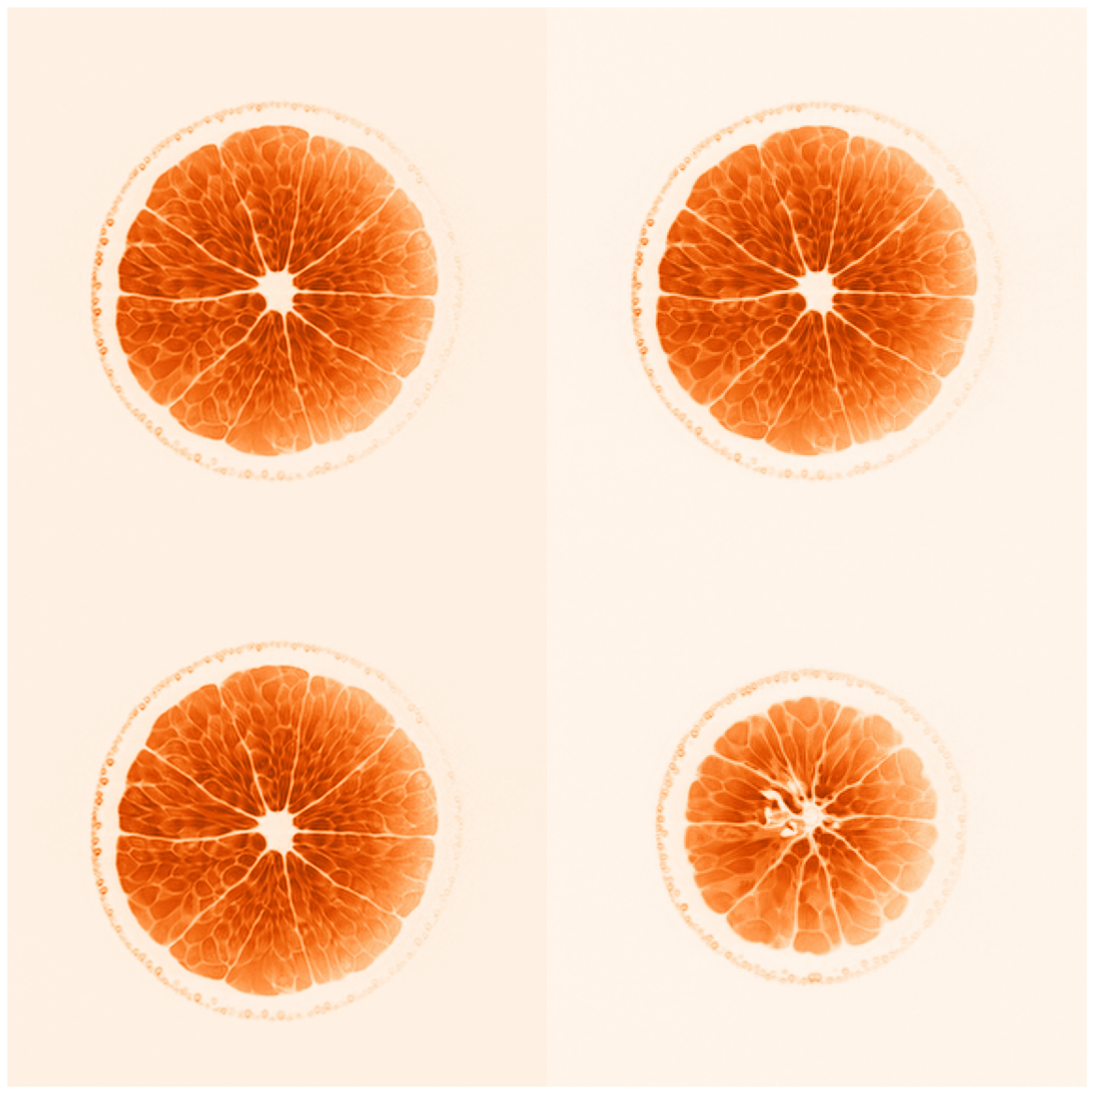

<Figure size 460.8x316.8 with 0 Axes>

In [94]:
# Plot
fig, axes = plt.subplots(2,2, figsize=(15,15))

image = data[:,:,60]

zoom_factor = 3
new_image = ndimage.zoom(image, zoom_factor)
new_image_2 = exposure.rescale_intensity(new_image)


axes[0,0].imshow(new_image,origin='lower',cmap='Oranges')
axes[0,0].axis('off')

axes[0,1].imshow(image,origin='lower',cmap='Oranges')
axes[0,1].axis('off')

axes[1,0].imshow(new_image_2,origin='lower',cmap='Oranges')
axes[1,0].axis('off')

axes[1,1].imshow(data[:,:,120],origin='lower',cmap='Oranges')
axes[1,1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()
plt.tight_layout()

In [106]:
display(new_image_2.shape)

(864, 864)

In [100]:
# Plot
slices = np.arange(19,140,6)
zoom_factor = 3


fig, axes = plt.subplots(4,5, figsize=(30,24))

for i in range(20):
    slice_num = slices[i]
    row = int(i // 5)
    column = int(i - 5*row)

    image = data[:,:,slice_num]
    image = ndimage.zoom(image, zoom_factor)
    image = exposure.rescale_intensity(image)
    
    axes[row,column].imshow(data[:,:,slice_num],origin='lower',cmap='Oranges')
    axes[row,column].axis('off')

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()
plt.tight_layout()

<Figure size 460.8x316.8 with 0 Axes>

(1.0, 0.9607843137254902, 0.9215686274509803, 1.0)

array([[1.        , 0.96078431, 0.92156863, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ],
       [0.49803922, 0.15294118, 0.01568627, 1.        ]])

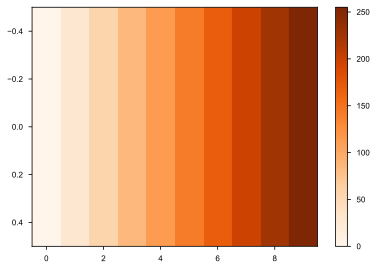

array([[255., 245., 235., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.],
       [127.,  39.,   4., 255.]])

In [115]:
import matplotlib.cm as cm

# 获取Oranges颜色映射
cmap = cm.get_cmap('Oranges')
display(cmap(0))


data = np.linspace(0, 255, 10)
colors = cmap(data)
display(colors)

# 显示颜色条和对应的颜色
fig, ax = plt.subplots()
im = ax.imshow([data], cmap=cmap, aspect='auto')
fig.colorbar(im)
plt.show()

RGB = 255*colors
display(RGB)

In [122]:
import matplotlib.cm as cm
from matplotlib import colors

# 获取Oranges颜色映射
cmap = cm.get_cmap('Oranges')

# 创建一维数据
data = np.linspace(0, 1, 10)

# 获取数据对应的颜色
colorss = cmap(data)

# 提取RGB值
rgb_values = [colorss[i, :3] for i in range(colorss.shape[0])]
display([255*i for i in rgb_values])
# 打印RGB值
for i, rgb in enumerate(rgb_values):
    rgb = colors.rgb2hex(rgb)  # 将RGB值转换为十六进制格式
    print(f"Color {i}: {rgb}")

[array([255., 245., 235.]),
 array([254.12156863, 231.82352941, 209.5254902 ]),
 array([253.24313725, 213.34901961, 172.69803922]),
 array([253.        , 185.33333333, 125.33333333]),
 array([253.        , 156.01176471,  81.38039216]),
 array([247.54117647, 124.62352941,  41.34901961]),
 array([233.,  94.,  13.]),
 array([204.6       ,  67.62352941,   1.48627451]),
 array([161.25882353,  52.17647059,   3.12156863]),
 array([127.,  39.,   4.])]

Color 0: #fff5eb
Color 1: #fee8d2
Color 2: #fdd5ad
Color 3: #fdb97d
Color 4: #fd9c51
Color 5: #f87d29
Color 6: #e95e0d
Color 7: #cd4401
Color 8: #a13403
Color 9: #7f2704


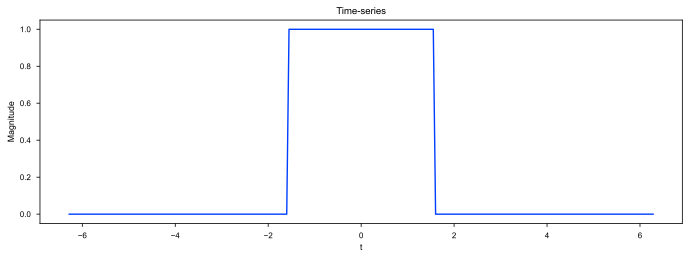

In [8]:
N = 256
T = np.pi
x = np.linspace(-2*np.pi,2*np.pi,N)
rect = np.where(np.abs(x)<T/2,1,0)

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x,rect)
ax.set_xlabel("t")
ax.set_ylabel("Magnitude")
ax.set_title('Time-series')

plt.tight_layout()

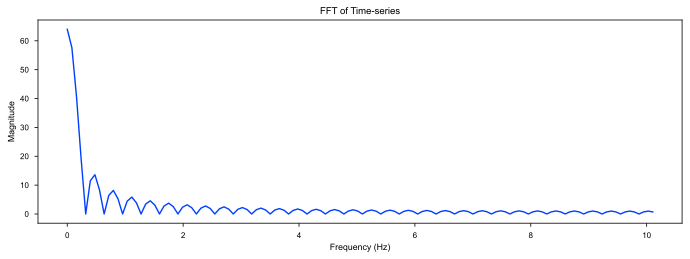

In [9]:
dt = 4*np.pi/N

spec = np.abs(np.fft.fft(rect))
freq = np.fft.fftfreq(len(spec), dt)

# Take the positive frequency
spec = spec[:len(spec)//2]
freq = freq[:len(freq)//2]

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(freq,spec)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Magnitude")
ax.set_title('FFT of Time-series')

plt.tight_layout()

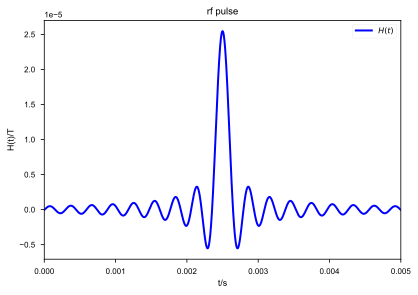

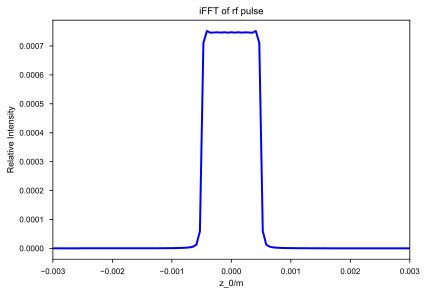

In [11]:
import numpy as np
import matplotlib.pyplot as plt

G_z = 0.08 #T/m
gamma = 2*np.pi*42.58e6 #rad/(sT)
z_0 = 0.001 #m
tau_m = 0.005 #s
omega_0 = gamma*G_z*z_0

t_min = 0
t_max = tau_m
N = 1000
t = np.linspace(t_min, t_max, N) #s
#y = np.sin(omega_0*(t))/(np.pi*gamma*(t)) #center
y = np.sin(omega_0*(t-tau_m/2))/(np.pi*gamma*(t-tau_m/2)) #case1


#signal of rf pulse

plt.plot(t, y, label="$H(t)$", color="blue", linewidth=2)

plt.xlabel("t/s")
plt.ylabel("H(t)/T")

plt.title("rf pulse")

plt.xlim(t_min, t_max)
#plt.ylim(-0.0001, 0.0001)

plt.legend()

plt.show()



#ifft of rf pulse

tt = np.linspace(-tau_m/2, tau_m/2, N) #s
#yy = np.fft.fft(np.sin(omega_0*(tt))/(np.pi*gamma*(tt))) #case1
yy = np.fft.fft(np.sin(omega_0/2*(tt))/(np.pi*gamma*(tt))) #case2, and xx should plus 0.0015
#yy = np.fft.fft(2*np.sin(omega_0/2*(tt))/(np.pi*gamma*(tt))*np.cos(3*omega_0/2*(tt))) #case3

yyf = abs(yy) #case1,2,3

xx = np.fft.fftfreq(N,tau_m/N)/gamma/G_z*2*np.pi #z-axis
#print(yyf)

plt.plot(np.fft.fftshift(xx),np.fft.fftshift(yyf), label="$iFFT$", color="blue", linewidth=2)
plt.title("iFFT of rf pulse")
plt.xlim(-0.003, 0.003)
plt.xlabel("z_0/m")
plt.ylabel("Relative Intensity")
plt.show()